In [157]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import math 
from IPython.display import display
import seaborn as sns

# EXPLORE THE DATA

In [158]:
# Read the data
football_data = pd.read_csv("2020.csv")
football_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [159]:
football_data.tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
252,E0,28/02/2021,12:00,Crystal Palace,Fulham,0,0,D,0,0,...,1.61,0.25,1.94,1.99,1.95,1.97,1.98,2.01,1.93,1.95
253,E0,28/02/2021,12:00,Leicester,Arsenal,1,3,A,1,2,...,1.74,-0.25,2.01,1.92,1.99,1.93,2.07,1.93,2.00,1.88
254,E0,28/02/2021,14:00,Tottenham,Burnley,4,0,H,3,0,...,2.00,-1.00,1.88,2.05,1.88,2.04,1.93,2.16,1.85,2.03
255,E0,28/02/2021,16:30,Chelsea,Man United,0,0,D,0,0,...,1.92,-0.25,2.05,1.85,2.07,1.87,2.08,1.91,2.02,1.86
256,E0,28/02/2021,19:15,Sheffield United,Liverpool,0,2,A,0,0,...,2.48,1.50,1.88,2.05,1.88,2.05,1.99,2.12,1.86,2.01


In [160]:
#Information on the dataframe.
football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 213.0+ KB


In [161]:
# Generating Descriptive statistics on the dataframe.
football_data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,...,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,1.338521,1.326848,0.669261,0.583658,12.455253,11.120623,4.439689,4.073930,11.315175,10.770428,...,2.090778,-0.168288,1.956381,1.955331,1.969922,1.961946,2.012568,2.016809,1.939805,1.941907
std,1.357198,1.299857,0.863512,0.825500,5.411120,4.840124,2.553578,2.301151,3.477310,3.568227,...,0.389270,0.864127,0.103008,0.099863,0.106957,0.103086,0.104469,0.106154,0.096867,0.095114
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,1.390000,-2.500000,1.700000,1.580000,1.740000,1.560000,1.830000,1.640000,1.740000,1.590000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,3.000000,9.000000,8.000000,...,1.800000,-0.750000,1.870000,1.880000,1.880000,1.880000,1.930000,1.920000,1.860000,1.860000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,4.000000,4.000000,11.000000,11.000000,...,2.060000,-0.250000,1.960000,1.950000,1.960000,1.960000,2.010000,2.020000,1.940000,1.940000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,13.000000,13.000000,...,2.280000,0.250000,2.050000,2.040000,2.050000,2.050000,2.090000,2.100000,2.020000,2.020000
max,9.000000,7.000000,4.000000,4.000000,28.000000,28.000000,14.000000,14.000000,23.000000,21.000000,...,3.550000,2.250000,2.350000,2.140000,2.590000,2.230000,2.650000,2.400000,2.450000,2.180000


# MISSING VALUES 


In [162]:
# To check for missing values by column 
print('There are {} null values in the football dataset.'.format(football_data.isnull().sum().sum()))

There are 0 null values in the football dataset.


# DROP COLUMNS 

In [163]:
football_data.drop(columns = [], inplace=True)
football_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


# WIN RATE

In [164]:
#Win Rate for the Home Team

no_matches = football_data.shape[0] #[0] for X-axis
no_features = football_data.shape[1] - 1  #[1] for Y-axis (total features - Labels to be determined)

no_homewins = len(football_data[football_data.FTR == 'H'])
win_rate = (float(no_homewins)/(no_matches))*100

print("Total number of matches: {}".format(no_matches))
print("Number of Features: {}".format(no_features))
print("Number of matches won by HOME team: {}".format(no_homewins))
print("Win rate of HOME team: {}".format(win_rate))

Total number of matches: 257
Number of Features: 105
Number of matches won by HOME team: 96
Win rate of HOME team: 37.35408560311284


In [165]:
#WIN RATE FOR THE AWAY TEAM
no_matches = football_data.shape[0] #[0] for X-axis
no_features = football_data.shape[1] - 1  #[1] for Y-axis (total features - Labels to be determined)

no_awaywins = len(football_data[football_data.FTR == 'A'])
win_rate = (float(no_awaywins)/(no_matches))*100

print("Total number of matches: {}".format(no_matches))
print("Number of Features: {}".format(no_features))
print("Number of matches won by AWAY team: {}".format(no_awaywins))
print("Win rate of AWAY team: {}".format(win_rate))

Total number of matches: 257
Number of Features: 105
Number of matches won by AWAY team: 101
Win rate of AWAY team: 39.29961089494164


# FULL TEAM NAMES

In [166]:
football_namelist = football_data['HomeTeam']
team_name=[]
for teams in football_namelist:
    if teams not in team_name:
        team_name.append(teams)
print("\n\nTeams in Season: 2020-2021")
display(team_name)



Teams in Season: 2020-2021


['Fulham',
 'Crystal Palace',
 'Liverpool',
 'West Ham',
 'West Brom',
 'Tottenham',
 'Brighton',
 'Sheffield United',
 'Everton',
 'Leeds',
 'Man United',
 'Arsenal',
 'Southampton',
 'Newcastle',
 'Chelsea',
 'Leicester',
 'Aston Villa',
 'Wolves',
 'Burnley',
 'Man City']

In [167]:
#Exporting Name of Team 
football_dataframe = pd.DataFrame(team_name, columns=["Team Names"])
display(football_dataframe)
football_dataframe.to_csv('Teams.csv', index=None)

,Team Names
0,Fulham
1,Crystal Palace
2,Liverpool
3,West Ham
4,West Brom
5,Tottenham
6,Brighton
7,Sheffield United
8,Everton
9,Leeds


In [186]:
def TeamData(teamName):
    
    #Num of goals in wins and looses
    gamesHome = football_data[football_data['HomeTeam']== teamName]
    TotalGoalsScored = gamesHome['FTHG'].sum()
    
    gamesAway = football_data[football_data['AwayTeam'] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    TotalGoalsScored += gamesAway['FTAG'].sum() 
        
    if numGames == 0: 
        totalGoalsScored = 0 
        HSPG = 0 #HomeShotsPerGame 
        ASPG = 0 #AwayShotsPerGame 
        scoringPercent = 0 
    
    return [teamName, TotalGoalsScored]

In [187]:
newStatList = []
for team in team_name:
    team_vector = getTeamData(team) 
    newStatList.append(team_vector)
    
teamStats = pd.DataFrame(newStatList, columns=['TeamName', 'TotalGoalsScored'])

In [188]:
display(teamStats)

,TeamName,TotalGoalsScored
0,Fulham,21
1,Crystal Palace,29
2,Liverpool,47
3,West Ham,40
4,West Brom,20
5,Tottenham,41
6,Brighton,26
7,Sheffield United,15
8,Everton,37
9,Leeds,43


# TOTAL GOALS SCORED PER TEAM 

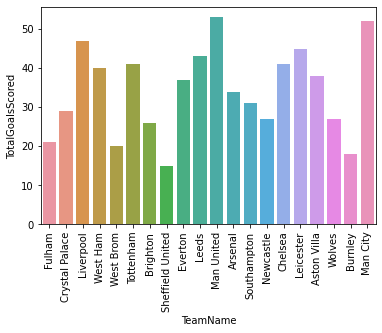

In [171]:
totalGoalsScoredPlot = sns.barplot(teamStats.TeamName, teamStats.TotalGoalsScored) 
for item in totalGoalsScoredPlot.get_xticklabels():
    item.set_rotation(90)
